# Pymaceuticals Inc.
---

### Observations and Insights
- *Your observations and insights here* ...


In [1]:
%matplotlib notebook
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Number of duplicate mice
merge_df["Mouse ID"].nunique()


249

In [3]:
merge_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='first').head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
merge_df["Mouse ID"].nunique()

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice=merge_df[merge_df.ne(merge_df.shift())['Mouse ID']] 
dup_mice[['Mouse ID','Timepoint']].head()
dup_time=dup_mice[dup_mice.ne(dup_mice.shift())['Timepoint']]
dup_time[['Mouse ID','Timepoint']].head()


,Mouse ID,Timepoint
0,k403,0


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_time.iloc[0:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cln_df=merge_df.drop_duplicates(subset=['Mouse ID'], keep='first', inplace=False, ignore_index=False)
clean_df=cln_df.drop(0,0)
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
50,s508,Ramicane,Male,1,17,0,45.0,0


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].count()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [10]:
# Complete summary statistics
tumv_df=merge_df.groupby(merge_df['Drug Regimen'])
mean_tumv=tumv_df['Tumor Volume (mm3)'].mean()
median_tumv=tumv_df['Tumor Volume (mm3)'].median()
variance_tumv=tumv_df['Tumor Volume (mm3)'].var()
std_tumv=tumv_df['Tumor Volume (mm3)'].std()
err_tumv=tumv_df['Tumor Volume (mm3)'].sem()

#Data Frame
drug_reg_data={'Tumor Volume Mean':mean_tumv,
               'Tumor Volume Median':median_tumv,
               'Tumor Volume Variance':variance_tumv,
               'Tumor Volume Std. Dev.':std_tumv,
               'Tumor Volume Std. Err':err_tumv }              
                 
drug_reg_data=pd.DataFrame(drug_reg_data,columns=['Tumor Volume Mean',
                                                  'Tumor Volume Median',
                                                  'Tumor Volume Variance',
                                                  'Tumor Volume Std. Dev.',
                                                  'Tumor Volume Std. Err'])
                                                     
drug_reg_data.head()

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [11]:
# Single line of code mirroring previous soultion
tumv_df.agg({'Tumor Volume (mm3)':["mean","median","var","std","sem"]}).head()

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

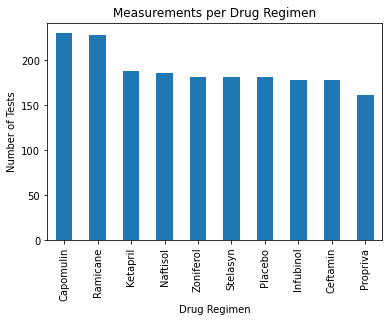

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
y_num_measure =merge_df['Drug Regimen'].value_counts()
Drug_chart= y_num_measure.plot(kind='bar')
Drug_chart.set_xlabel("Drug Regimen")
Drug_chart.set_ylabel("Number of Tests")
plt.title("Measurements per Drug Regimen")
plt.show()
x_axis = merge_df['Drug Regimen'].value_counts().keys().tolist()

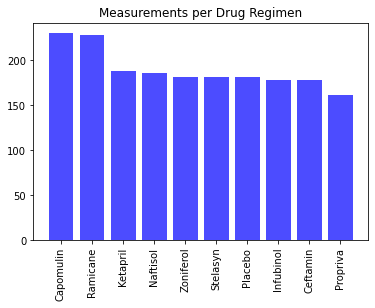

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.
plt.bar(x_axis, y_num_measure, color='b', alpha=0.70, align="center")
plt.xticks(rotation = 90)
plt.title("Measurements per Drug Regimen")
plt.show()

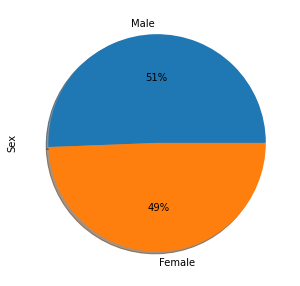

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
merge_df["Sex"].value_counts().plot(kind='pie', shadow = True,figsize=(5,5), autopct='%1.0f%%')
plt.show()

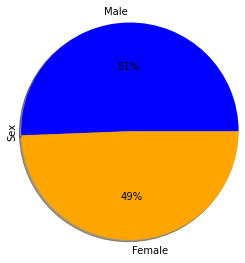

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#merge_df["Sex"].value_counts()[958,935]
labels = ["Male","Female"]
sizes = [958,935]
colors=["blue","Orange"]

plt.pie(sizes,labels=labels, colors=colors,
        autopct="%1.0f%%", shadow=True, startangle=360, radius=1.25)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
lsttime_df=merge_df.groupby("Mouse ID").max()["Timepoint"]
lsttime_df.head()

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
Name: Timepoint, dtype: int64

In [17]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_df = pd.merge(lsttime_df, merge_df, on=("Mouse ID","Timepoint"), how="left")
last_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    final_tv=last_df.loc[last_df["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    tumor_vol_list.append(final_tv)
     
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tv.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier=final_tv.loc[(final_tv<lower_bound) | (final_tv>upper_bound)]
    print(f"Potential outliers for {drug};{outlier}")

Potential outliers for Capomulin;Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane;Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol;31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin;Series([], Name: Tumor Volume (mm3), dtype: float64)


## Line and Scatter Plots

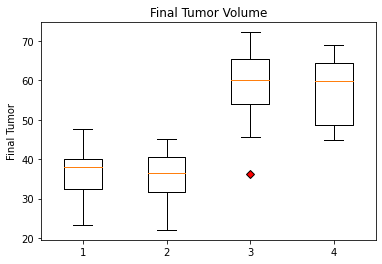

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Final_tumor=tumor_vol_list
outlier=dict(markerfacecolor='r', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel("Final Tumor")
ax1.boxplot(Final_tumor,flierprops=outlier)
plt.show()                



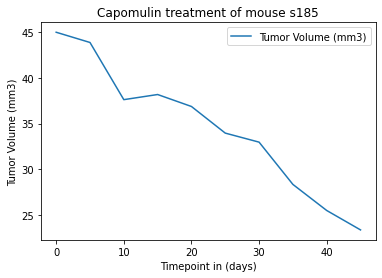

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
y_capo=merge_df.loc[merge_df["Mouse ID"]=="s185",["Timepoint","Tumor Volume (mm3)"]]  
y_capo.plot("Timepoint","Tumor Volume (mm3)")
plt.xlabel("Timepoint in (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse s185")
plt.show()

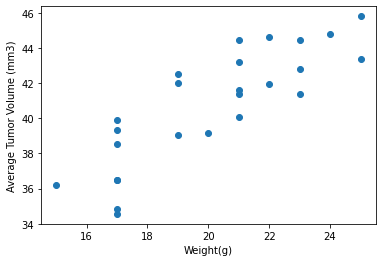

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df=merge_df.loc[merge_df["Drug Regimen"]=="Capomulin"]
Capomulin_df
Capoavg_df=Capomulin_df.groupby(Capomulin_df['Mouse ID']).mean()
plt.scatter(Capoavg_df["Weight (g)"], Capoavg_df["Tumor Volume (mm3)"])
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr_coe=round(st.pearsonr(Capoavg_df['Weight (g)'],Capoavg_df['Tumor Volume (mm3)'])[0],2)
corr_coe

0.84

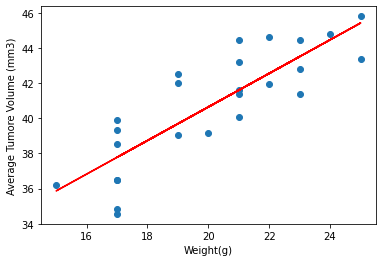

In [23]:
#st.linregress defines mx+b
line_slope=st.linregress(Capoavg_df['Weight (g)'],Capoavg_df['Tumor Volume (mm3)'])
line_slope
mslope=line_slope[0]
bintercept=line_slope[1]
y_values = Capoavg_df['Weight (g)']*mslope+bintercept
plt.scatter(Capoavg_df['Weight (g)'],Capoavg_df['Tumor Volume (mm3)'])
plt.plot(Capoavg_df['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.show()